In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hexagon_utilities import *
from colors import *

import matplotlib.pyplot as plt

In [3]:
def save_file(title=None, details=None):
    SAVE_FILE = True
    if SAVE_FILE:
        fn = ''
        if title is not None:
            fn += title
            
        if details is not None:
            fn+= details
            
        dtstr = datetime.now().strftime("%Y-%m-%d_%H-%M-%S_%p")

            
        plt.savefig(f'../images/{fn+dtstr}.jpg')

(-5.475, 4.975, -2.8578838324886475, 2.8578838324886475)

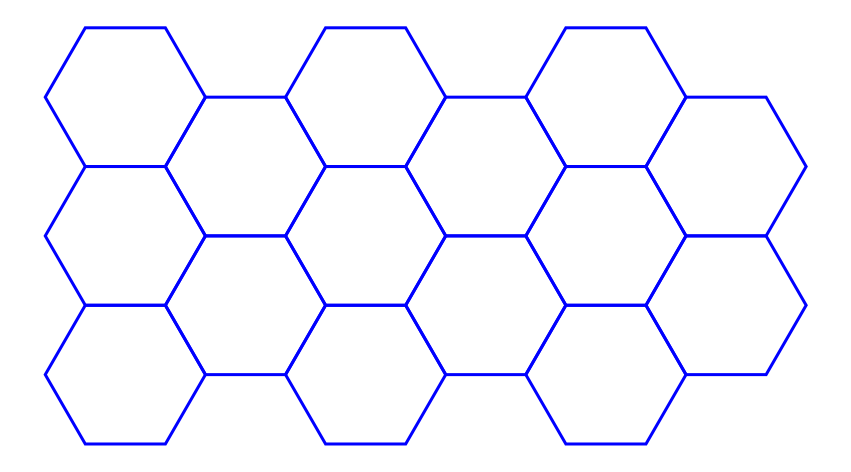

In [4]:
fig, ax = plt.subplots(figsize=(15,15))

#color_size_dict = {'blue': 0.9, 'red': 0.8, 'black': 0.6, 'white': 0.2}
hg = HexGrid(5,3,1, flat=True)

for idx, h in enumerate(hg.hlist):
    h.render(fill=None, lw=3, color='blue')
    
ax.axis('scaled')
plt.axis('off')

In [5]:
??h.v_connect

(-5.475, 4.975, -2.8578838324886475, 2.8578838324886475)

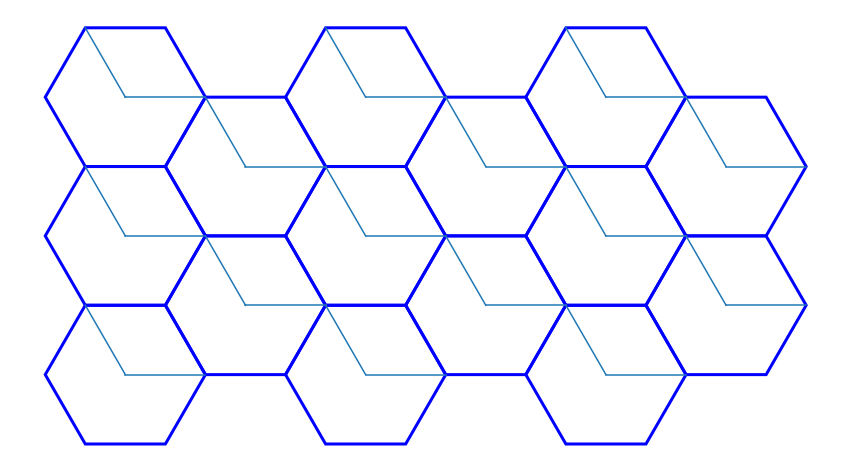

In [6]:
fig, ax = plt.subplots(figsize=(15,15))

#color_size_dict = {'blue': 0.9, 'red': 0.8, 'black': 0.6, 'white': 0.2}
hg = HexGrid(5,3,1, flat=True)

for idx, h in enumerate(hg.hlist):
    h.render(fill=None, lw=3, color='blue')
    h.render_spokes([0,2])
    
ax.axis('scaled')
plt.axis('off')

In [7]:
[(x, (x+2)%6) for x in range(6)] 

[(0, 2), (1, 3), (2, 4), (3, 5), (4, 0), (5, 1)]

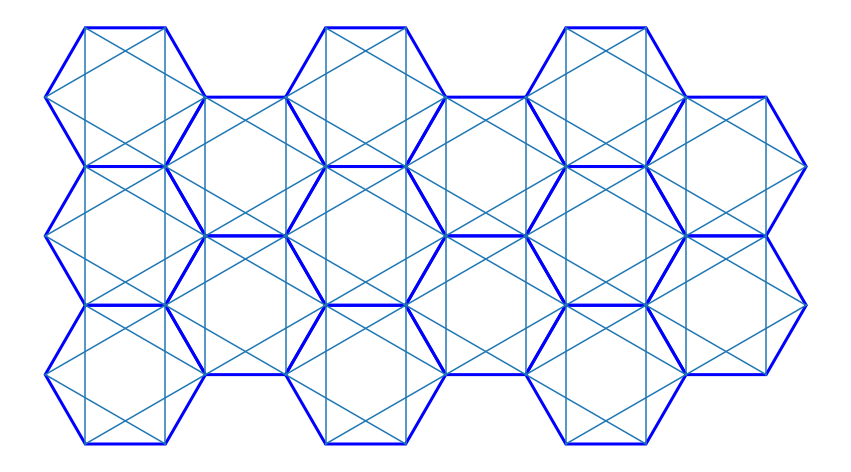

In [8]:
fig, ax = plt.subplots(figsize=(15,15))

size=1
hg = HexGrid(5,3,size, flat=True)

v_pairs = [(x, (x+2)%6) for x in range(6)] #connect every other pair of vertices

for idx, h in enumerate(hg.hlist):
    h.render(fill=None, lw=3, color='blue')
    h.v_connect(v_pairs)
    
ax.axis('scaled')
plt.axis('off');

(-4.325, 2.825, -1.0392304845413265, 2.7712812921102037)

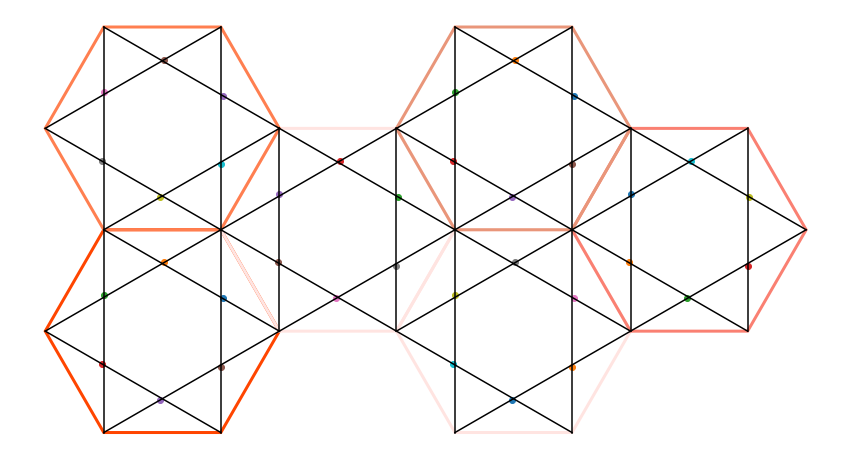

In [9]:
fig, ax = plt.subplots(figsize=(15,15))

hg = HexGrid(3,2,1, flat=True)

v_pairs = [(x, (x+2)%6) for x in range(6)]
dist = sqrt(size**2 + (size/2)**2)

for idx, h in enumerate(hg.hlist):
    h.render(fill=None, lw=3, color=np.random.choice(REDS))
    h.v_connect(v_pairs, color='black')
    for ai in range(6):
        plt.scatter(
        h.verts[ai].x + dist/2 * sin((-60*(ai+1)+0)*PI/180),
        h.verts[ai].y + dist/2 * cos((-60*(ai+1)+0)*PI/180)
        )    

        
ax.axis('scaled')
plt.axis('off')

But we don't need to do this using a loop. There is a method in hexagon_utilities that does just this for us.

It is called `get_points_vert_rtheta()`
So what does this method do? It returns 6 points. Each of the returned point is related to one Vertex.
It is exactly `dist` away from the vertex, and it is at a specified angle `theta` away from the vertex.

Let's use that to get the place where Two lines intersect. These two lines are: V1-V3 and V2-V4 line.

(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

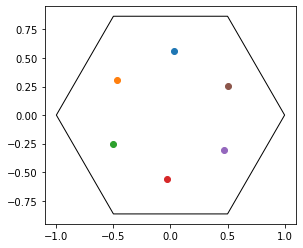

In [10]:
h = Hex(0,0, size=1)
h.get_verts()
h.render(fill=None)

pts = h.get_points_vert_rtheta(dist, 0 )

for p in pts:
    plt.scatter(*p)

plt.axis('scaled')

### Example Usage of `get_points_center_rtheta()`

This is also a very useful function when you want to get 6 points, equidistant and at the same angle from the 6 vertices.

(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

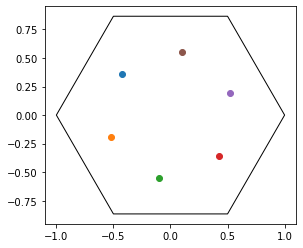

In [11]:
h = Hex(0,0, size=1)
h.get_verts()
h.render(fill=None)

pts = h.get_points_center_rtheta(dist/2, 10 )

for p in pts:
    plt.scatter(*p)

plt.axis('scaled')

Based on changing the inputs (arguments) to these methods, we can create interesting effects. Here is what happens if we keep changing the angle by 10 degrees and plotting that on One Hexagon.

(-1.1, 1.1, -1.1800113942344606, 1.1792859231347987)

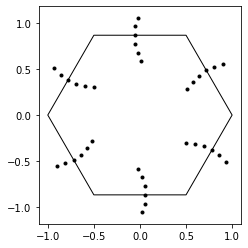

In [12]:
h = Hex(0,0, size=1)
h.get_verts()
h.render(fill=None)

for angle in range(0, 60, 10):
    pts = h.get_points_vert_rtheta(dist/2, angle )
    for p in pts:
        plt.scatter(*p, color='k', marker='.')

plt.axis('scaled')

(-7.775, 9.275, -2.9011851026778697, 3.767210506462308)

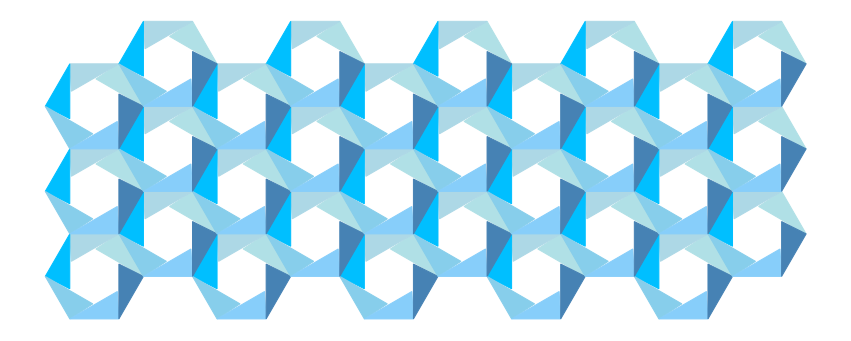

In [13]:
fig, ax = plt.subplots(figsize=(15,15))

hg = HexGrid(6,5,1, flat=True)

v_pairs = [(x, (x+2)%6) for x in range(6)]
dist = sqrt(size**2 + (size/2)**2)

for idx, h in enumerate(hg.hlist):
    #h.render(fill=None, lw=3, color=np.random.choice(REDS))
    #h.v_connect(v_pairs, color='black')
    
    #get hold of the points wherein the Line vertices-v1-v3 interesects with the line v2-v4
    pts = h.get_points_vert_rtheta(dist, 0)
    
    for v in range(6):
        h.render_polygon([v, pts[v], (v+1)%6], include_center=False, color=BLUES[v])
    
        
ax.axis('scaled')
plt.axis('off')

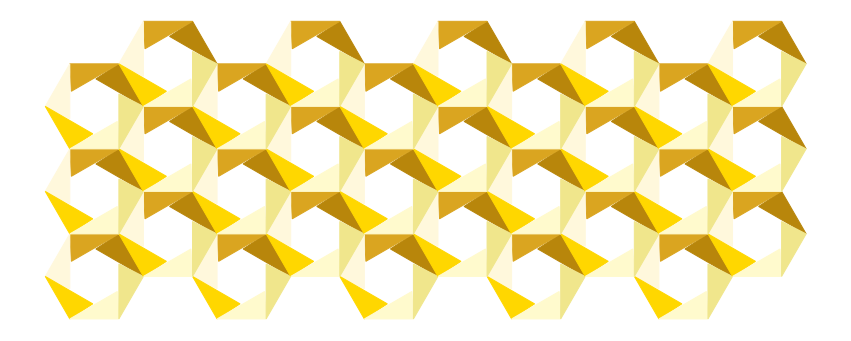

In [14]:
fig, ax = plt.subplots(figsize=(15,15))

hg = HexGrid(6,5,1, flat=True)

v_pairs = [(x, (x+2)%6) for x in range(6)]
dist = sqrt(size**2 + (size/2)**2)

for idx, h in enumerate(hg.hlist):
    
    #Uncomment this if you want to see the hexagons clearly...
    #h.render(fill=None, lw=3, color='black')
    #h.v_connect(v_pairs, color='black')
    
    #get hold of the points wherein the Line vertices-v1-v3 interesects with the line v2-v4
    pts = h.get_points_vert_rtheta(dist, 0)
    
    for v in range(6):
        h.render_polygon([v, pts[v], (v+1)%6], include_center=False, color=YELLOWS[v])
    
        
ax.axis('scaled')
plt.axis('off')

save_file('Camera_shutter')

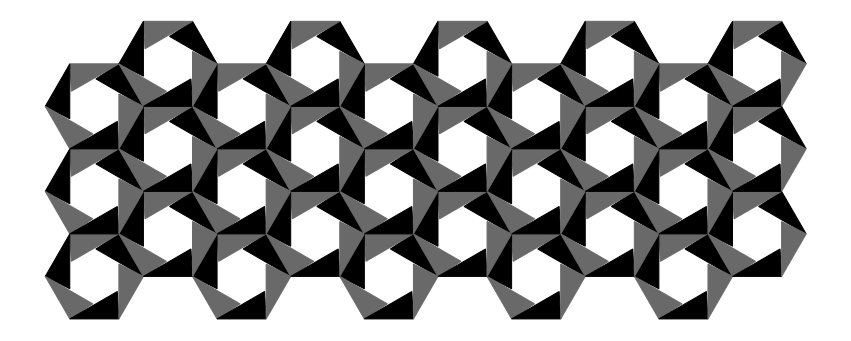

In [15]:
fig, ax = plt.subplots(figsize=(15,15))

hg = HexGrid(6,5,1, flat=True)

v_pairs = [(x, (x+2)%6) for x in range(6)]
dist = sqrt(size**2 + (size/2)**2)

for idx, h in enumerate(hg.hlist):
    
    #Uncomment this if you want to see the hexagons clearly...
    #h.render(fill=None, lw=3, color='black')
    #h.v_connect(v_pairs, color='black')
    
    #get hold of the points wherein the Line vertices-v1-v3 interesects with the line v2-v4
    pts = h.get_points_vert_rtheta(dist, 0)
    
    for v in range(6):
        h.render_polygon([v, pts[v], (v+1)%6], include_center=False, color=BLACK_WHITES[v%2])
    
        
ax.axis('scaled')
plt.axis('off')

save_file('Camera_shutter')